In [1]:
!pip install opencv-python

In [2]:
import cv2

In [3]:
img = cv2.imread('sample.jpg') #reading an image 
img                            # each pixel has (r,g,b) value

array([[[230, 230, 230],
        [230, 230, 230],
        [230, 230, 230],
        ...,
        [230, 230, 230],
        [230, 230, 230],
        [230, 230, 230]],

       [[230, 230, 230],
        [230, 230, 230],
        [230, 230, 230],
        ...,
        [230, 230, 230],
        [230, 230, 230],
        [230, 230, 230]],

       [[230, 230, 230],
        [230, 230, 230],
        [230, 230, 230],
        ...,
        [230, 230, 230],
        [230, 230, 230],
        [230, 230, 230]],

       ...,

       [[ 58,  41,  62],
        [ 59,  42,  63],
        [ 60,  43,  64],
        ...,
        [ 15,   8,  21],
        [ 22,  16,  27],
        [ 20,  14,  25]],

       [[ 59,  42,  63],
        [ 59,  42,  63],
        [ 59,  42,  63],
        ...,
        [  2,   0,   9],
        [ 12,   8,  19],
        [  1,   0,   8]],

       [[ 59,  42,  63],
        [ 59,  42,  63],
        [ 59,  42,  63],
        ...,
        [ 45,  41,  52],
        [ 56,  52,  63],
        [ 46,  42,  53]]

In [4]:
print(img.shape,img.ndim)

(794, 686, 3) 3


794 -> rows <br>
686 -> columns <br>
each cell having 3 values (r,g,b) <br>
This cell is a Pixel.

In [5]:
import matplotlib.pyplot as plt

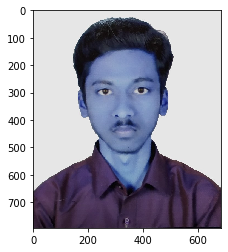

In [6]:
plt.imshow(img)    #colourloss

In [7]:
while True:
    cv2.imshow('picture',img)
    # 27 -> Escape key
    # 2 ms after pressing ESC
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()
        
    

The <b>Viola–Jones object detection framework</b> is an object detection framework which was proposed in 2001 by Paul Viola and Michael Jones. Although it can be trained to detect a variety of object classes, it was motivated primarily by the problem of face detection.

<img src = 'https://i.ytimg.com/vi/F5rysk51txQ/maxresdefault.jpg'>


Rectangle features:
<ol>
<li>Value = Σ (pixels in black area) - Σ (pixels in white area)</li>
<li>Three types: two-, three-, four-rectangles, Viola & Jones used two-rectangle features</li>
<li>For example: the difference in brightness between the white & black rectangles over a specific area</li>
<li>Each feature is related to a special location in the sub-window</li>
    </ol>
    
Note : if value->0  ... No Face<br/>
          value->1  ... Face

In [8]:
haar_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [9]:
haar_data.detectMultiScale(img)

array([[152, 154, 352, 352]], dtype=int32)

detectMultiScale -> detects presence of faces <br>And outputs a list of faces each having **[x-coordinate, y-coordinate, width, height]**

In [10]:
#cv2.rectangle(img,(x,y),(w,h),(b,g,r),border_thickness)
#rectangle around face

In [11]:
img = cv2.imread('people.jpg') 
while True:
    faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),3)
    cv2.imshow('pic',img)
    
    if cv2.waitKey(2) == 27:
        break
        
cv2.destroyAllWindows()

'https://www.youtube.com/watch?v=csYkGeJ5bCM&t=769s'

In [23]:
capture = cv2.VideoCapture(0)
data = []
while True:
    flag, img = capture.read()
    
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),3)
            face = img[y:y+h,x:x+w, : ]
            face = cv2.resize(face,(50,50))
            
            data.append(face)
            print(len(data))
            
        cv2.imshow('pic',img)
    
        if cv2.waitKey(2) == 27 or len(data)>200:
            break
capture.release()       
cv2.destroyAllWindows()
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201


In [22]:
import numpy as np
np.save('without_mask.npy',data)

In [24]:
np.save('with_mask.npy',data)
#note that we run video capture agai to create data for with mask

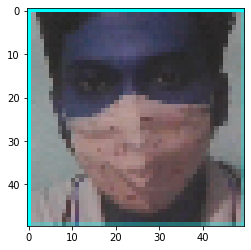

In [25]:
plt.imshow(data[0])